In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [3]:
pic=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_data=pic.flow_from_directory('/content/drive/MyDrive/AI/datas/dataFood/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 770 images belonging to 10 classes.


In [5]:
validation_data=pic.flow_from_directory('/content/drive/MyDrive/AI/datas/dataFood/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 130 images belonging to 10 classes.


In [6]:
training_data.class_indices

{'banhbeo': 0,
 'banhpia': 1,
 'banhtrangtron': 2,
 'banhxeo': 3,
 'bunthitnuong': 4,
 'chaca': 5,
 'nemchua': 6,
 'pho': 7,
 'thitkhotau': 8,
 'xoigac': 9}

In [7]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [8]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history=model.fit(training_data,epochs=500,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
25/25 [==============================] - 291s 11s/step - loss: 2.8638 - accuracy: 0.1104 - val_loss: 2.3128 - val_accuracy: 0.0769
Epoch 2/500
25/25 [==============================] - 10s 412ms/step - loss: 2.3023 - accuracy: 0.1078 - val_loss: 2.3139 - val_accuracy: 0.0769
Epoch 3/500
25/25 [==============================] - 10s 417ms/step - loss: 2.3027 - accuracy: 0.1078 - val_loss: 2.3156 - val_accuracy: 0.0769
Epoch 4/500
25/25 [==============================] - 10s 409ms/step - loss: 2.2982 - accuracy: 0.1104 - val_loss: 2.3141 - val_accuracy: 0.0692
Epoch 5/500
25/25 [==============================] - 10s 418ms/step - loss: 2.2587 - accuracy: 0.1584 - val_loss: 2.2933 - val_accuracy: 0.0923
Epoch 6/500
25/25 [==============================] - 10s 414ms/step - loss: 2.2119 - accuracy: 0.1649 - val_loss: 2.3503 - val_accuracy: 0.1000
Epoch 7/500
25/25 [==============================] - 10s 418ms/step - loss: 2.2536 - accuracy: 0.1636 - val_loss: 2.2905 - val_accuracy: 

<function matplotlib.pyplot.show>

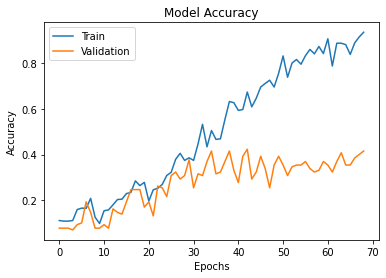

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
model.save("foodDetect.h5")

In [12]:
model_food=load_model('foodDetect.h5')

pho


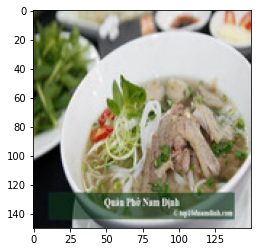

In [14]:
img=load_img("/content/drive/MyDrive/AI/datas/dataFood/test/pho.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='nemchua'
if round(result[0][7])==1:
  prediction='pho'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

xoigac


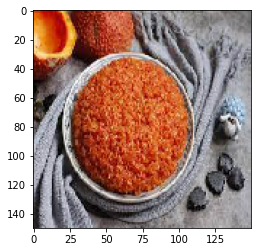

In [15]:
img=load_img("/content/drive/MyDrive/AI/datas/dataFood/test/xoigac.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='nemchua'
if round(result[0][7])==1:
  prediction='pho'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

banhxeo


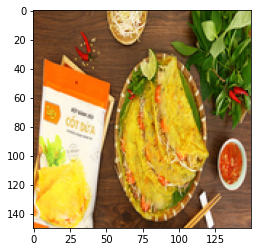

In [16]:
img=load_img("/content/drive/MyDrive/AI/datas/dataFood/test/banhxeo.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='nemchua'
if round(result[0][7])==1:
  prediction='pho'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

chaca


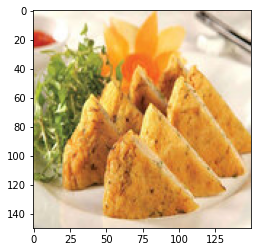

In [17]:
img=load_img("/content/drive/MyDrive/AI/datas/dataFood/test/chaca.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='nemchua'
if round(result[0][7])==1:
  prediction='pho'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

bunthitnuong


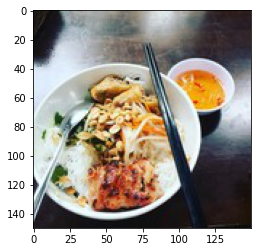

In [18]:
img=load_img("/content/drive/MyDrive/AI/datas/dataFood/test/bunthitnuong.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='nemchua'
if round(result[0][7])==1:
  prediction='pho'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)